#Exercise

The dataset is about the image data of natural scenes around the world.
This dataset size 150 x 150 distributed under 6 categories as follows:

0 - buildings

1 - forest

2 - glacier

3 - mountain

4 - sea

5 - street

The train and test are separated in each files. 

In [93]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [94]:
!unzip "/drive/My Drive/Colab Notebooks/nature.zip" -d "/drive/MyDrive/Colab Notebooks/nature"

Archive:  /drive/My Drive/Colab Notebooks/nature.zip
replace /drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20057.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [95]:
import numpy as np
import pandas as pd
import keras.utils as image
import keras.layers as layers

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler 

In [96]:
train_path = '/drive/MyDrive/Colab Notebooks/nature/nature/seg_train/seg_train'
test_path = '/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test'

In [97]:
import os

folders = os.listdir(train_path)

for folder in folders:
    if os.path.isdir(os.path.join(train_path, folder)):
        print(folder)

buildings
forest
glacier
mountain
sea
street


In [98]:

items = ['buildings','forest','glacier','mountain','sea','street']

import cv2
from tqdm import tqdm

features = []
for i in items:
    for img in tqdm((os.listdir(os.path.join(train_path,i)))):
        im = cv2.imread(os.path.join(os.path.join(train_path,i) , img))
        im = cv2.resize(im , (100,100))
        features.append(im)

100%|██████████| 510/510 [00:02<00:00, 244.25it/s]


In [99]:
X_train = np.array(features)
X_train.shape

(2700, 100, 100, 3)

In [100]:
labels = []
k = 0
for i in items:
    for img in tqdm((os.listdir(os.path.join(train_path,i)))):
        labels.append(k)
    k = k+1

100%|██████████| 510/510 [00:00<00:00, 1484451.80it/s]


In [101]:
Y_train = np.array(labels)
Y_train.shape

(2700,)

In [102]:

items = ['buildings','forest','glacier','mountain','sea','street']

import cv2
from tqdm import tqdm

features_test = []
for i in items:
    for img in tqdm((os.listdir(os.path.join(test_path,i)))):
        im = cv2.imread(os.path.join(os.path.join(test_path,i) , img))
        #im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im , (100,100))
        features_test.append(im)

100%|██████████| 90/90 [00:00<00:00, 334.88it/s]


In [103]:
X_test = np.array(features_test)
X_test.shape

(536, 100, 100, 3)

In [104]:
labels_test = []
k = 0
for i in items:
    for img in tqdm((os.listdir(os.path.join(test_path,i)))):
        labels_test.append(k)
    k = k+1

100%|██████████| 90/90 [00:00<00:00, 612804.16it/s]


In [105]:
Y_test = np.array(labels_test)
Y_test.shape

(536,)

In [106]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding
y_train = to_categorical(Y_train)
y_test= to_categorical(Y_test)

In [123]:
L1 = 16
L2 = 32
L3 = 128

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu', input_shape=(100,100,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(L2,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(L3,(3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(6,activation='softmax'))


In [124]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [125]:
history = model.fit(X_train, y_train, epochs =10, batch_size = 100, 
                    validation_data = (X_test, y_test))

Epoch 1/10
27/27 [==============================] - 29s 1s/step - loss: 1.5574 - accuracy: 0.4137 - val_loss: 1.3482 - val_accuracy: 0.4944
Epoch 2/10
27/27 [==============================] - 28s 1s/step - loss: 1.2090 - accuracy: 0.5459 - val_loss: 1.1861 - val_accuracy: 0.5354
Epoch 3/10
27/27 [==============================] - 27s 1s/step - loss: 1.0596 - accuracy: 0.6070 - val_loss: 1.0841 - val_accuracy: 0.6138
Epoch 4/10
27/27 [==============================] - 27s 1s/step - loss: 1.0059 - accuracy: 0.6311 - val_loss: 1.0578 - val_accuracy: 0.6250
Epoch 5/10
27/27 [==============================] - 27s 1s/step - loss: 0.9252 - accuracy: 0.6619 - val_loss: 0.9711 - val_accuracy: 0.6623
Epoch 6/10
27/27 [==============================] - 28s 1s/step - loss: 0.8791 - accuracy: 0.6807 - val_loss: 0.9811 - val_accuracy: 0.6399
Epoch 7/10
27/27 [==============================] - 27s 1s/step - loss: 0.8492 - accuracy: 0.7030 - val_loss: 0.9001 - val_accuracy: 0.6698
Epoch 8/10
27/27 [==

<Figure size 640x480 with 0 Axes>

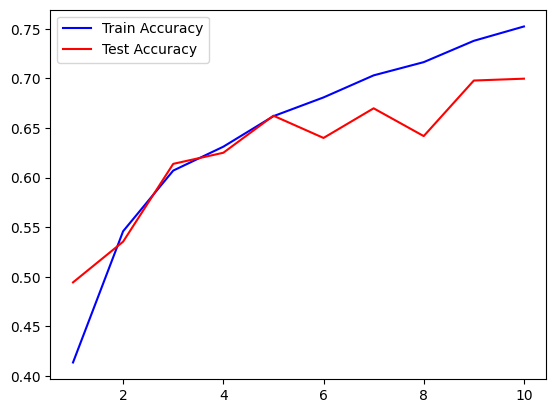

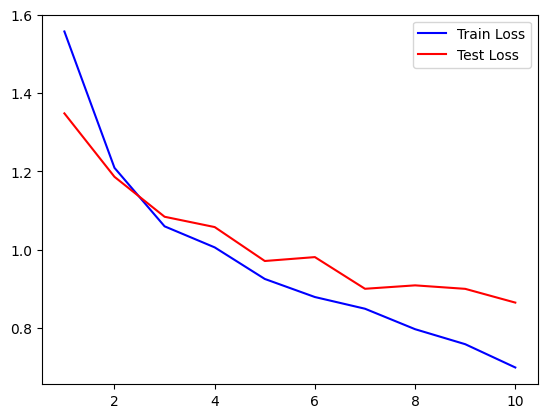

<Figure size 640x480 with 0 Axes>

In [126]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()